# About Dataset
## Context
This dataset contains an airline passenger satisfaction survey. <br>
What factors are highly correlated to a satisfied (or dissatisfied) passenger? <br>
Can you predict passenger satisfaction?

## Content
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

Note that this data set was modified from this dataset by John D here. It has been cleaned up for the purposes of classification.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

In [79]:
df = pd.read_csv('train.csv')
df.head(3)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


Clean dataset

In [80]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [81]:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [82]:
df.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


In [83]:
# edit columns name
df.columns = [x.replace(' ','_').lower() for x in df.columns]

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             103904 non-null  object 
 1   customer_type                      103904 non-null  object 
 2   age                                103904 non-null  int64  
 3   type_of_travel                     103904 non-null  object 
 4   class                              103904 non-null  object 
 5   flight_distance                    103904 non-null  int64  
 6   inflight_wifi_service              103904 non-null  int64  
 7   departure/arrival_time_convenient  103904 non-null  int64  
 8   ease_of_online_booking             103904 non-null  int64  
 9   gate_location                      103904 non-null  int64  
 10  food_and_drink                     103904 non-null  int64  
 11  online_boarding                    1039

In [85]:
# check missing value
df.isna().sum()

gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
inflight_wifi_service                  0
departure/arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
on-board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             310
satisfaction                           0
dtype: int64

In [86]:
df.arrival_delay_in_minutes.describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: arrival_delay_in_minutes, dtype: float64

In [87]:
print(f'arrival delay in minutes Median = {df.arrival_delay_in_minutes.median()}')

# Fill na values in column 'Arrival Delay in Minutes'
df.arrival_delay_in_minutes = df.arrival_delay_in_minutes.fillna(df.arrival_delay_in_minutes.median())

arrival delay in minutes Median = 0.0


In [88]:
df.isna().sum()

gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
inflight_wifi_service                0
departure/arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

In [89]:
df.head(10)

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [90]:
df.satisfaction.value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [91]:
# We assume neutral = dissatisfied
df.satisfaction.replace({'neutral or dissatisfied': 0, 'satisfied': 1}, inplace=True)

In [92]:
df.satisfaction

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int64

In [93]:
df.gender.value_counts()

Female    52727
Male      51177
Name: gender, dtype: int64

In [94]:
df.columns

Index(['gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

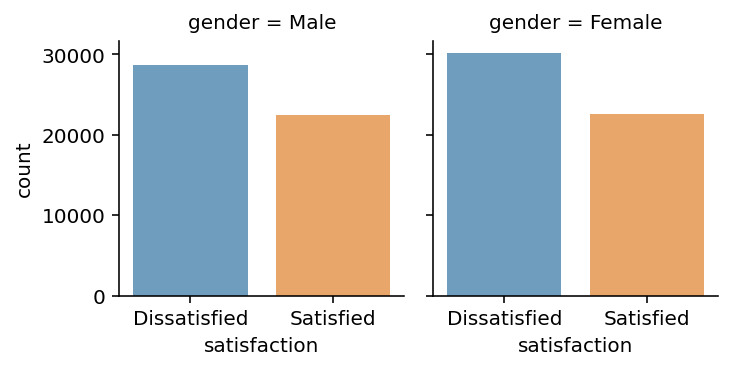

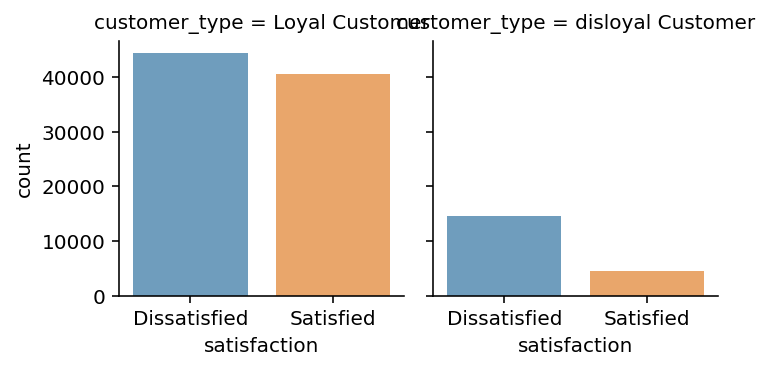

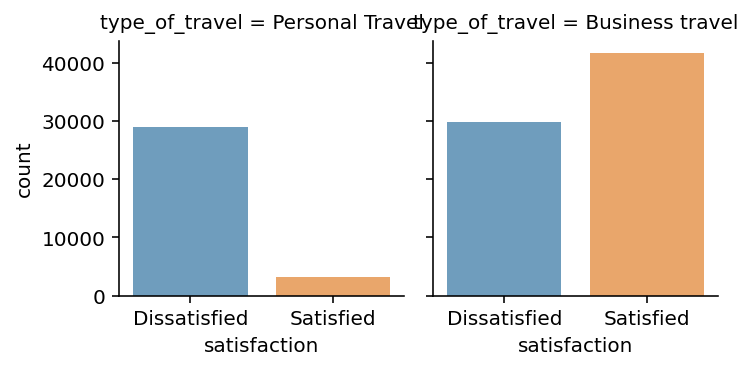

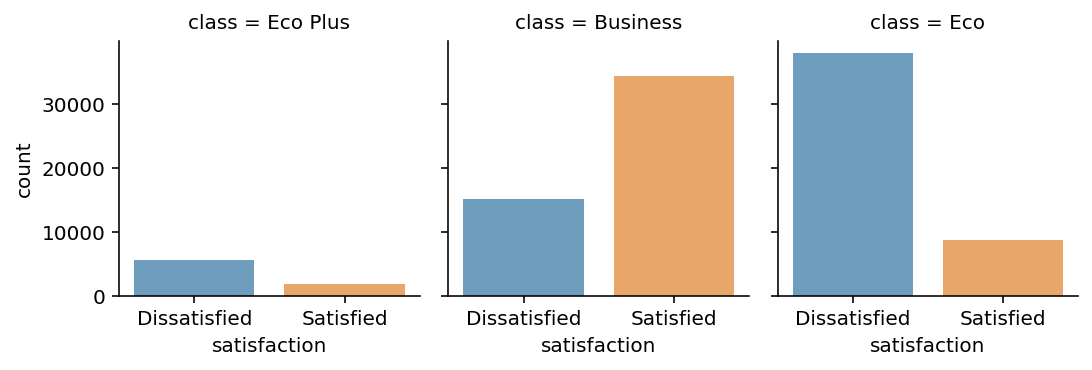

In [95]:
cols={'gender': 2, 'customer_type': 2, 'type_of_travel': 2, 'class': 3}

for k, v in cols.items():
    sns.catplot(x='satisfaction', col=k, col_wrap=v, data=df, kind="count", height=2.5, aspect=1.0,alpha=0.7)  
    plt.xticks(ticks=[0 ,1],labels=['Dissatisfied','Satisfied'])

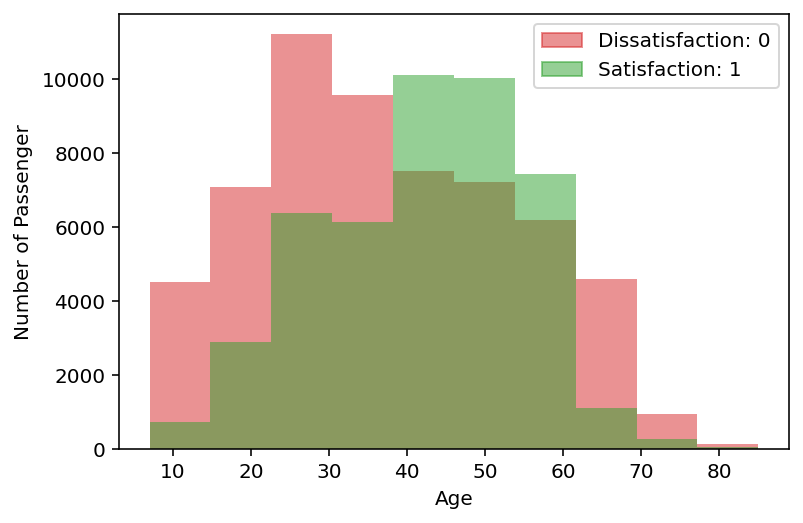

In [96]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

plt.subplot()
alpha=0.5
plt.hist(x='age', data=df[df.satisfaction==0], alpha=alpha, color='tab:red')
plt.hist(x='age', data=df[df.satisfaction==1], alpha=alpha, color='tab:green');

plt.xlabel('Age')
plt.ylabel('Number of Passenger')

# legend
blue_patch = mpatches.Patch(color='tab:red', label='Dissatisfaction: 0',alpha=alpha)
orange_patch = mpatches.Patch(color='tab:green', label='Satisfaction: 1', alpha=alpha)
plt.legend(handles=[blue_patch, orange_patch])

plt.show()

**Age:** range between 0-40 and 60+ dissatisfied passenger is higher compared to satisfied passenger

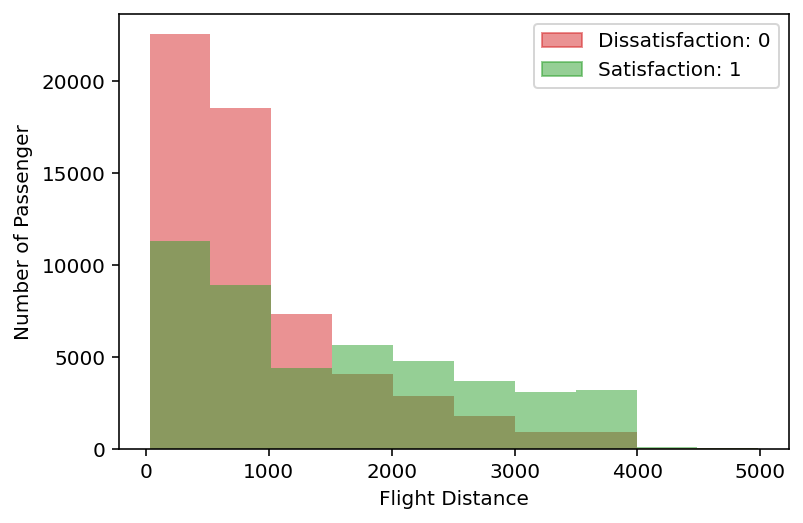

In [97]:
alpha=0.5

plt.hist(x='flight_distance', data=df[df.satisfaction==0], alpha=alpha, color='tab:red')
plt.hist(x='flight_distance', data=df[df.satisfaction==1], alpha=alpha, color='tab:green')

plt.xlabel('Flight Distance')
plt.ylabel('Number of Passenger')

# legend
blue_patch = mpatches.Patch(color='tab:red', label='Dissatisfaction: 0',alpha=alpha)
orange_patch = mpatches.Patch(color='tab:green', label='Satisfaction: 1', alpha=alpha)
plt.legend(handles=[blue_patch, orange_patch])

plt.show()

**Flight Distance:** range between 0-1000 dissatisfied passenger is higher compared to satisfied passenger

In [ ]:
survey_cols=['inflight_wifi_service',
             'departure/arrival_time_convenient', 'ease_of_online_booking',
             'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
             'inflight_entertainment', 'on-board_service', 'leg_room_service',
             'baggage_handling', 'checkin_service', 'inflight_service','cleanliness']

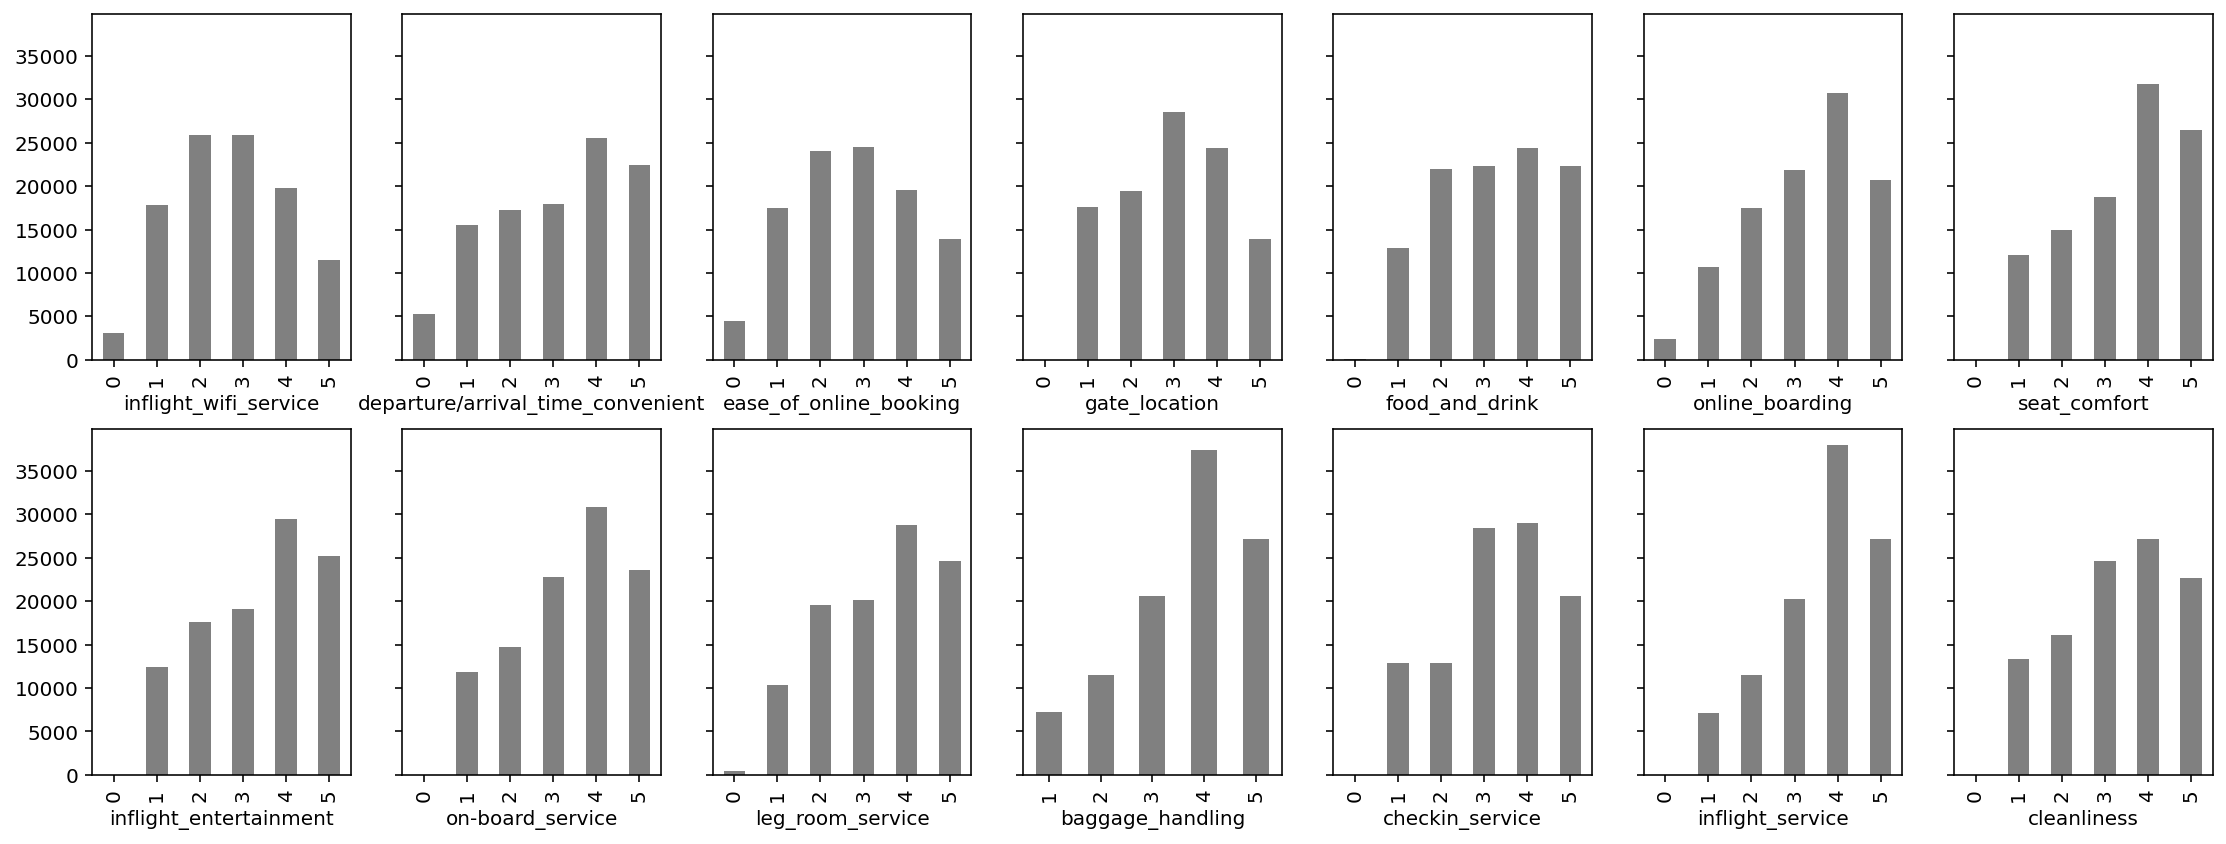

In [98]:
n_cols=7
n_rows=2
i=0

fig, axes = plt.subplots(n_rows,n_cols, figsize=(19,7), sharey=True)

for row in range(n_rows):
    for col in range(n_cols):
        df[survey_cols[i]].value_counts().sort_index().plot(kind='bar',ax=axes[row, col], color='grey')
        i+=1
        
for c, ax in enumerate(axes.flat):
    ax.set(xlabel=survey_cols[c])
    

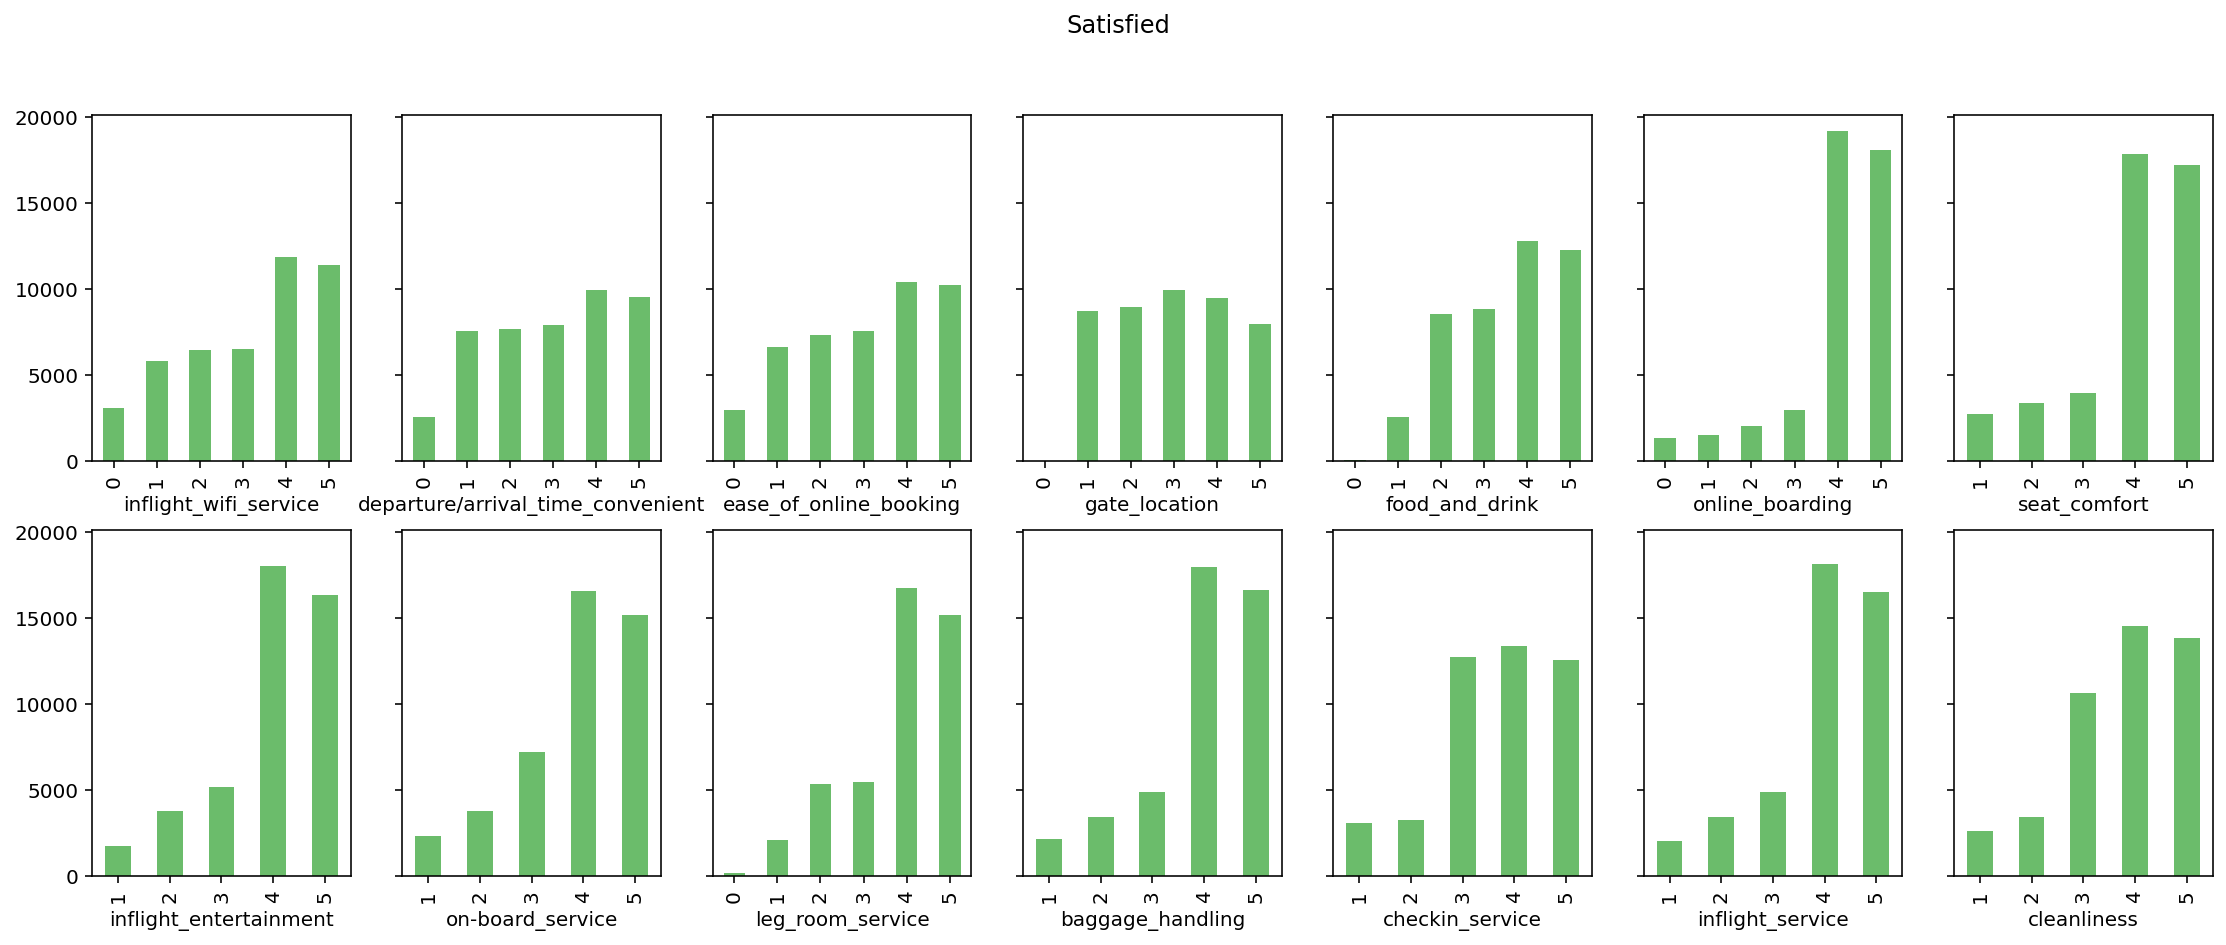

In [107]:
n_cols=7
n_rows=2
i=0

fig, axes = plt.subplots(n_rows,n_cols, figsize=(19,7), sharey=True)

for row in range(n_rows):
    for col in range(n_cols):
        df[df.satisfaction==1][survey_cols[i]].value_counts().sort_index().plot(kind='bar',
                                                                                ax=axes[row, col],
                                                                                color='tab:green',
                                                                                alpha=0.7)
        i+=1
        
for c, ax in enumerate(axes.flat):
    ax.set(xlabel=survey_cols[c])
    
fig.suptitle('Satisfied')
plt.show()

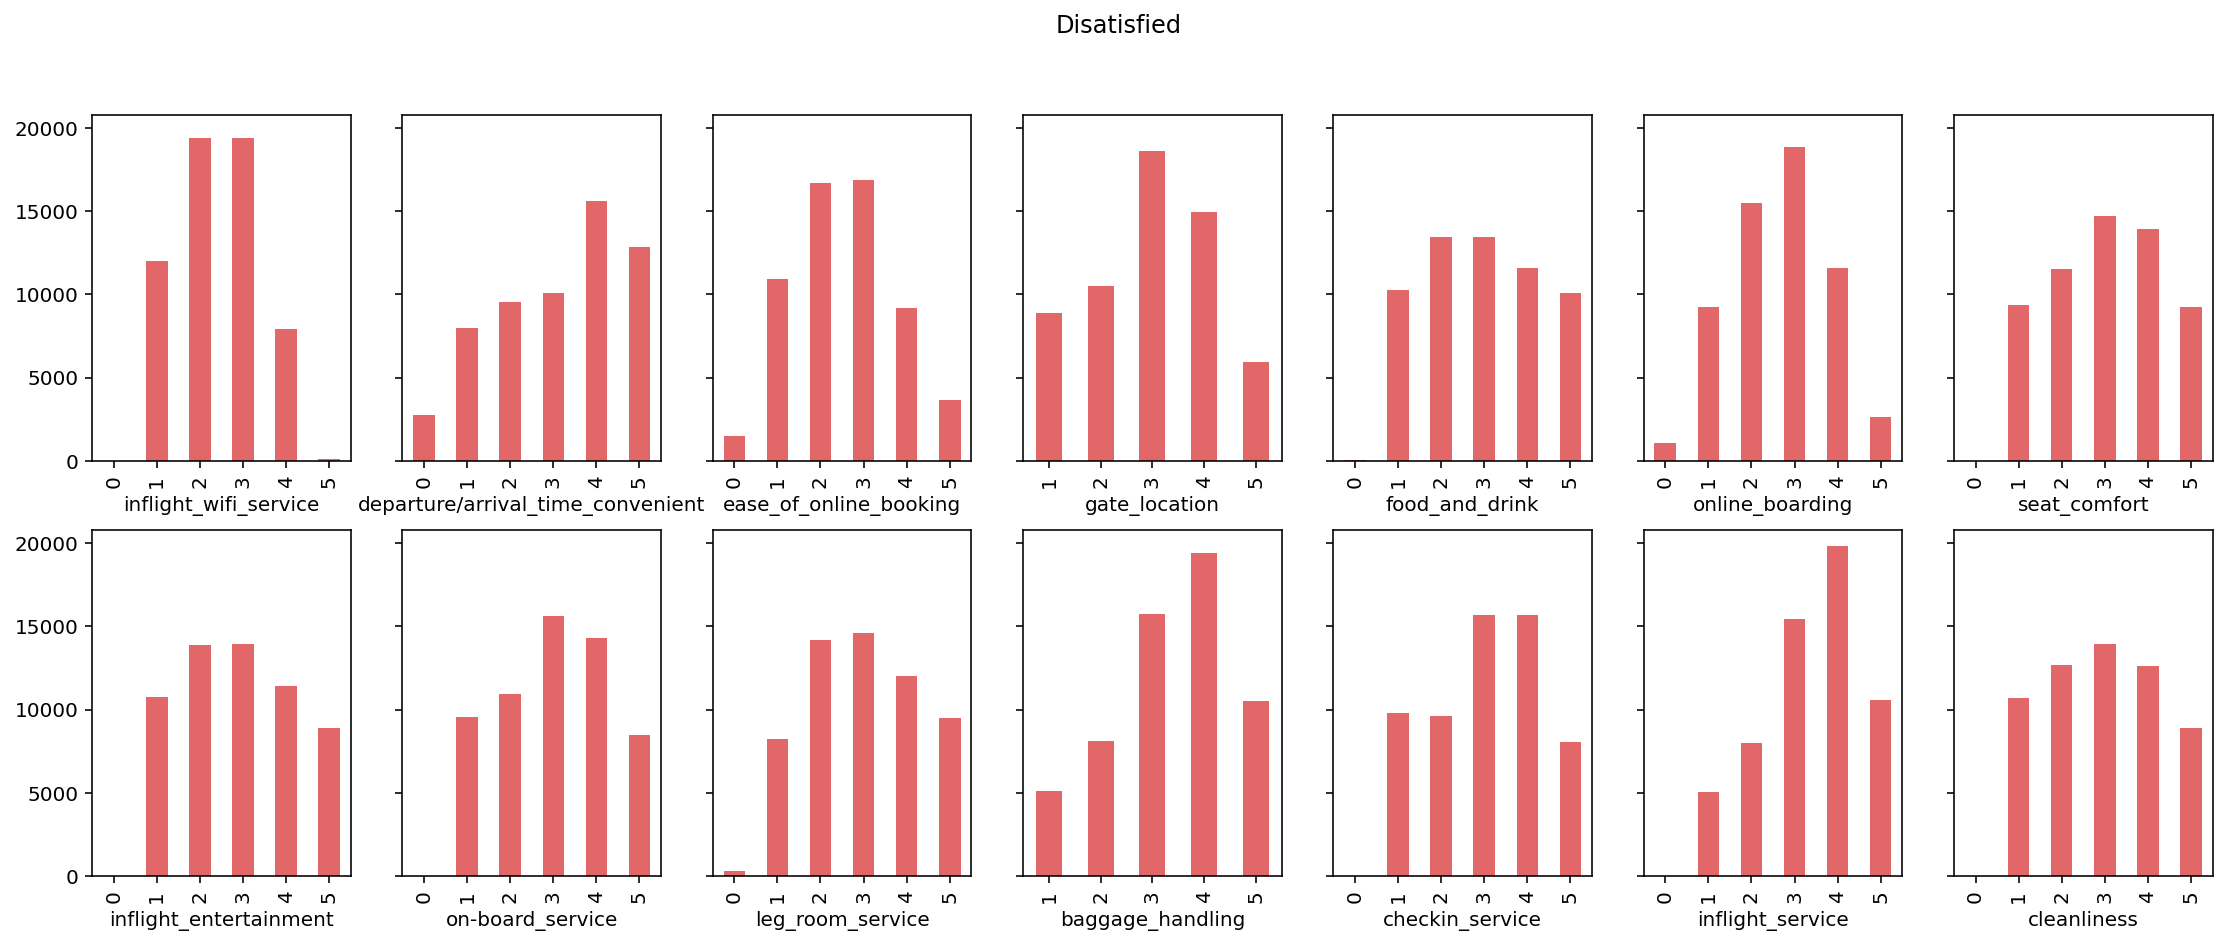

In [108]:
n_cols=7
n_rows=2
i=0

fig, axes = plt.subplots(n_rows,n_cols, figsize=(19,7), sharey=True)

for row in range(n_rows):
    for col in range(n_cols):
        df[df.satisfaction==0][survey_cols[i]].value_counts().sort_index().plot(kind='bar',
                                                                                ax=axes[row, col],
                                                                                color='tab:red',
                                                                                alpha=0.7)
        i+=1
        
for c, ax in enumerate(axes.flat):
    ax.set(xlabel=survey_cols[c])
    
fig.suptitle('Disatisfied')
plt.show()

In [131]:
data=[]
for i in range(len(survey_cols)):
    data.append(df[survey_cols[i]].value_counts().sort_index())
    data.append(df[df.satisfaction==1][survey_cols[i]].value_counts().sort_index())
    data.append(df[df.satisfaction==0][survey_cols[i]].value_counts().sort_index())

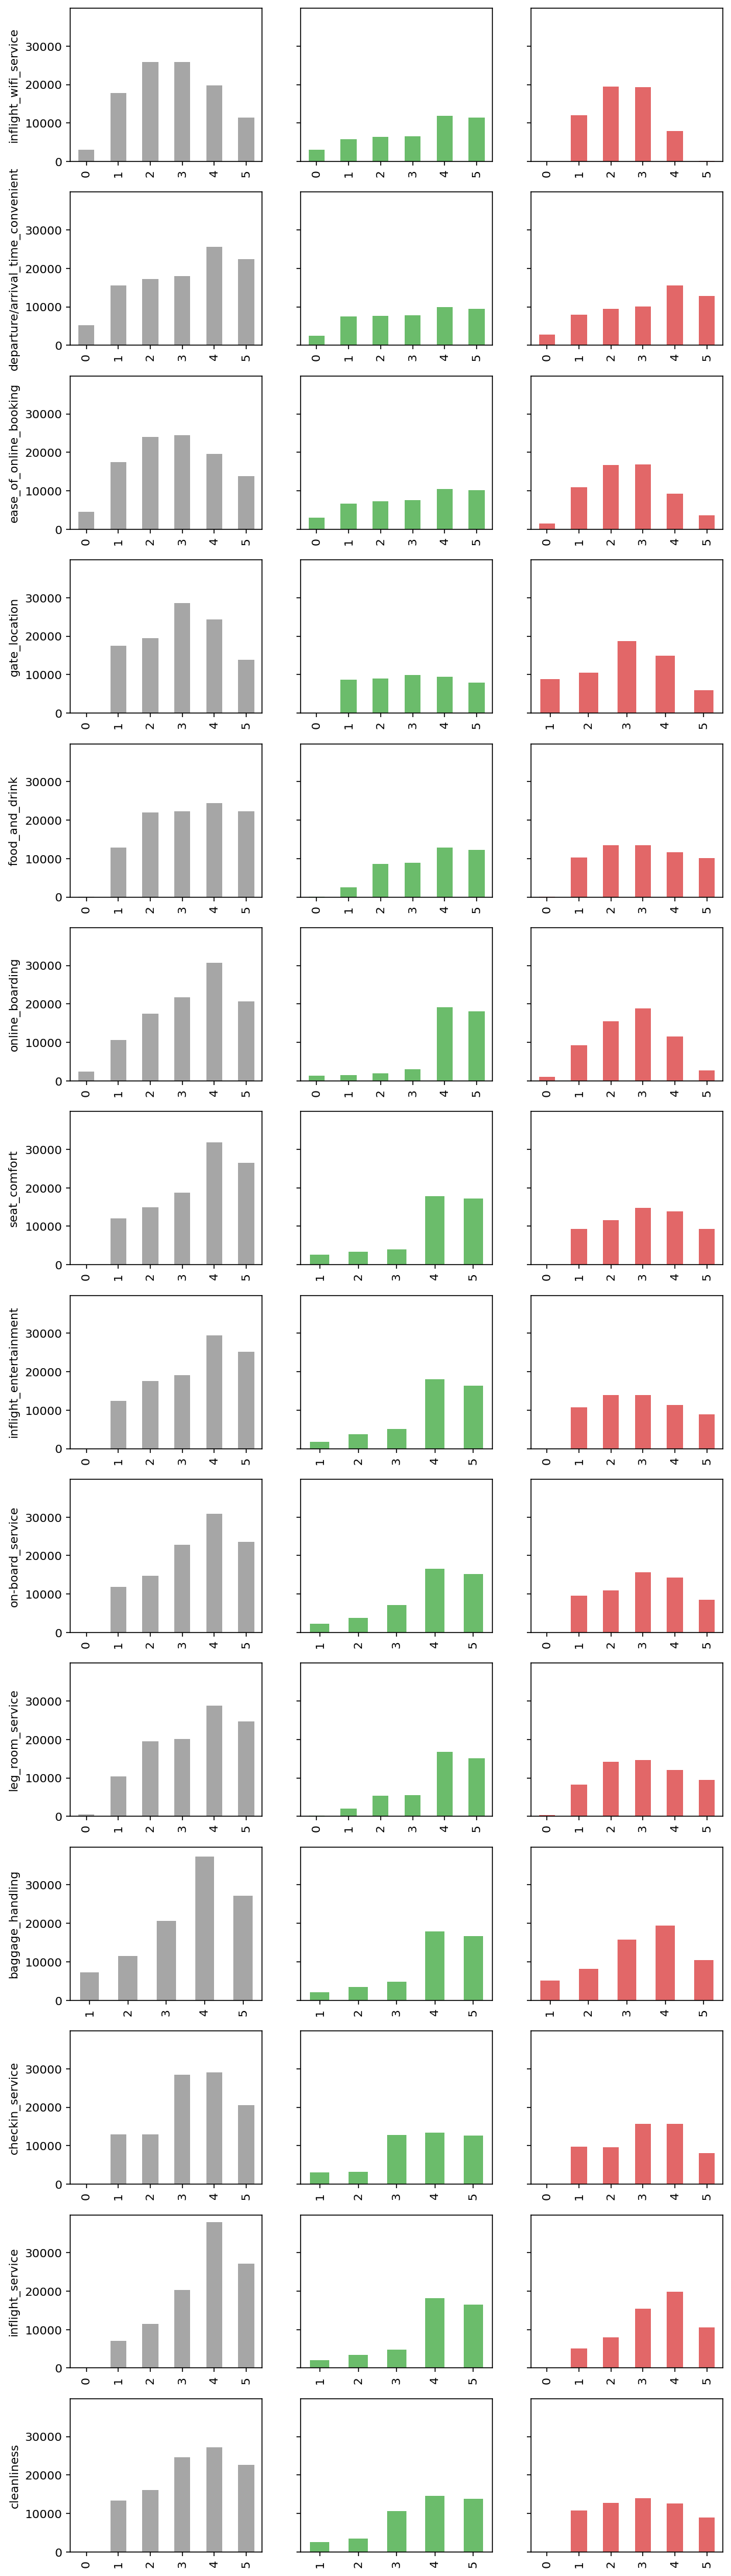

In [156]:
n_cols=3
n_rows=14
i=0

colors = ['grey', 'tab:green', 'tab:red']

fig, axes = plt.subplots(n_rows,n_cols, figsize=(10,40), sharey=True, sharex=False)

for row in range(n_rows):
    for col in range(n_cols):
        data[i].plot(kind='bar',ax=axes[row, col], color=colors[col], alpha=0.7)
        i+=1

triple_survey_cols=[]
for col in survey_cols:
    triple_survey_cols.append(col)
    triple_survey_cols.append(col)
    triple_survey_cols.append(col)

for c, ax in enumerate(axes.flat):
    ax.set(ylabel=triple_survey_cols[c])


## Reference
---

#### Legend guide

In [104]:
from IPython.display import IFrame

url = 'https://matplotlib.org/2.0.2/users/legend_guide.html'
IFrame(url, width=800, height=400)

---
#### Subplot

In [105]:
url='https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html'
from IPython.display import IFrame

IFrame(url, width=800, height=400)

### List of named colors

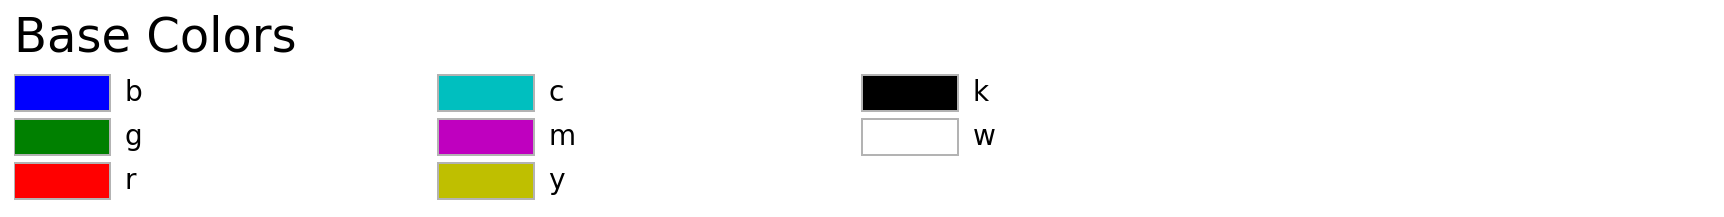

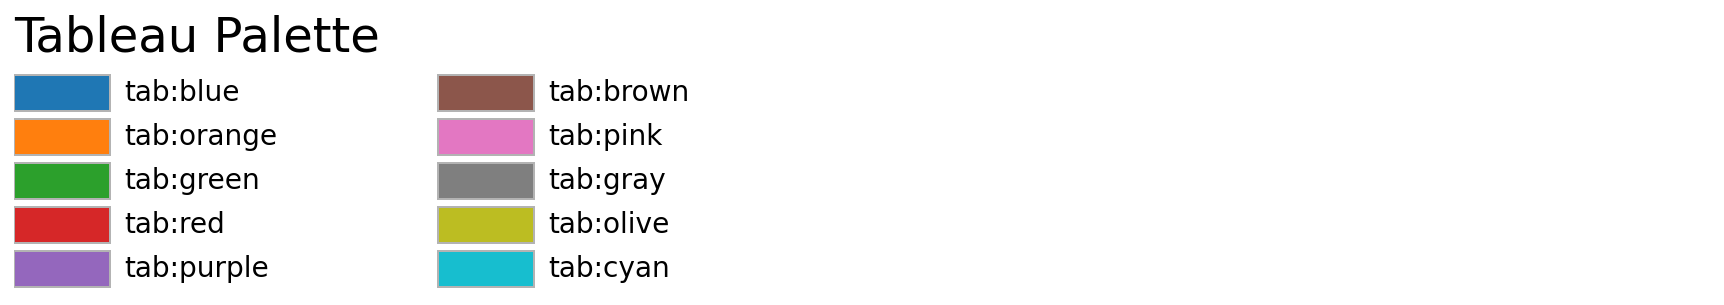

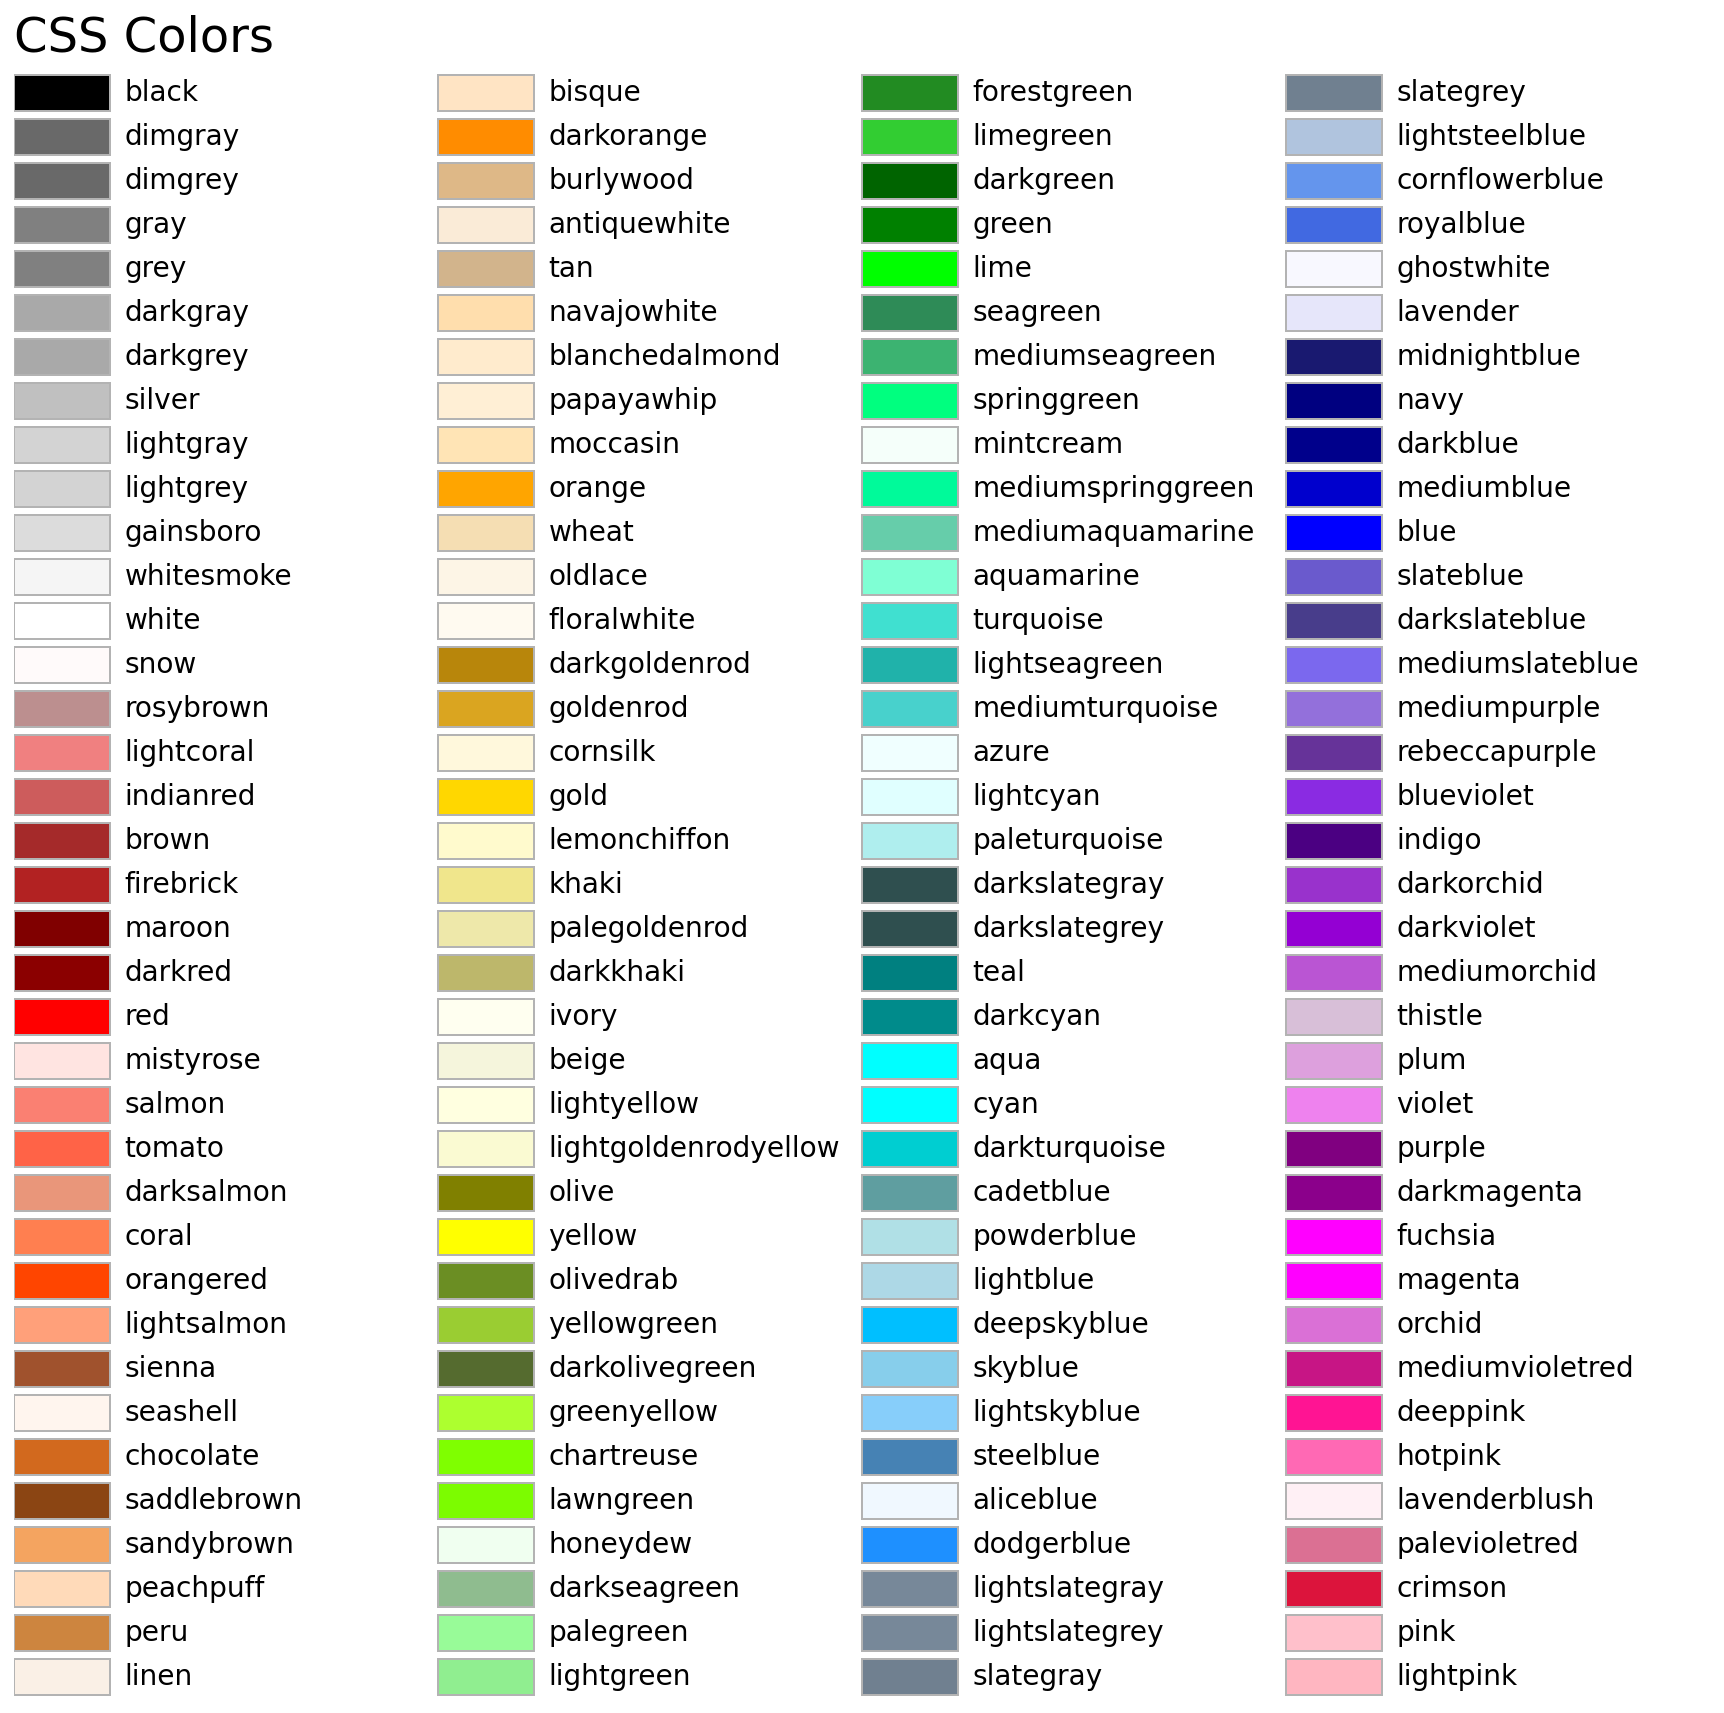

In [106]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
                sort_colors=False, emptycols=2)

plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

# Optionally plot the XKCD colors (Caution: will produce large figure)
# xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
# xkcd_fig.savefig("XKCD_Colors.png")

plt.show()